In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


import utils
from utils.extractors.target_encoding_extractor import TargetEncodingExtractor

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/p.a.nikulin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
sns.set_theme("notebook")

In [3]:
path = "../../data/"
data_start = pd.read_csv(path + 'train_events.csv')
video_start = pd.read_csv(path + 'video_info_v2.csv')
targets_start = pd.read_csv(path + 'train_targets.csv')

In [4]:
data_start.head(5)

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976


In [5]:
# data_start = data_start.truncate(after=100)

In [6]:
from utils import Imputer, MainFeatureExtractor, GeoFeatureExtractor, UserFeatureExtractor

events, features = Imputer().fit_transform(data_start, video_start, targets_start)

In [7]:
events.head()

,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,local_time,utc_delta,title,category,duration,author_id,duration_sec
0,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,133074,10067243,2024-06-01 08:40:58+00:00,5,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219,2456
1,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,362960,10245341,2024-06-01 21:33:24+00:00,5,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760,519
2,St.-Petersburg,desktop,browser,Windows,Chrome,5647,96775,10894333,2024-06-01 21:30:43+00:00,3,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257,5518
3,Moscow,smartphone,mobile app,Android,Rutube,1521,161610,10029092,2024-06-01 23:03:42+00:00,3,Сергей Орлов-снял дом!!!,Разное,1522069,1058671,1522
4,Moscow,smartphone,mobile app,Android,Rutube,71,116245,10452976,2024-06-01 22:48:09+00:00,3,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020,1249


In [8]:
features.head()

,viewer_uid,age,sex,age_class
0,10087154,30,0,1
1,10908708,25,1,1
2,10190464,34,0,2
3,10939673,25,0,1
4,10288257,48,0,3


In [9]:
extractor = TargetEncodingExtractor()

extractor.fit(events, features)

extractor.authors_categories

/Users/p.a.nikulin/ML/SocDemPrediction/utils/extractors/target_encoding_extractor.py:25: FutureWarning: The provided callable <function sum at 0x105662d40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  self.authors_categories = with_targets.groupby('author_id').agg(


,age_class_0,age_class_1,age_class_2,age_class_3
author_id,,,,
1000000,0.000000,0.000000,1.000000,0.000000
1000003,0.000000,0.000000,0.000000,1.000000
1000004,0.017538,0.149239,0.331568,0.501655
1000005,0.023055,0.337176,0.412104,0.227666
1000007,0.000000,0.500000,0.500000,0.000000
...,...,...,...,...
1125386,0.000000,1.000000,0.000000,0.000000
1125388,0.000000,0.000000,0.000000,1.000000
1125398,0.000000,1.000000,0.000000,0.000000


In [10]:
predicted_features = extractor.transform(events, features)
predicted_features.head(n=10)


/Users/p.a.nikulin/ML/SocDemPrediction/utils/extractors/target_encoding_extractor.py:37: FutureWarning: The provided callable <function sum at 0x105662d40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  user_duration_sum = events_test.groupby('viewer_uid').agg(
/Users/p.a.nikulin/ML/SocDemPrediction/utils/extractors/target_encoding_extractor.py:44: FutureWarning: The provided callable <function sum at 0x105662d40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  with_weight_sum = events_test.groupby('viewer_uid').agg(
/Users/p.a.nikulin/ML/SocDemPrediction/utils/extractors/target_encoding_extractor.py:54: FutureWarning: The provided callable <function sum at 0x105662d40> is currently using SeriesGroupBy.sum. In a future version of pandas, the

,viewer_uid,age_class_0,age_class_1,age_class_2,age_class_3,age,sex,age_class
0,10000001,0.041783,0.420448,0.394027,0.143742,40,1,2
1,10000002,0.013066,0.353981,0.473585,0.159368,44,0,3
2,10000004,0.005649,0.125379,0.440562,0.428410,36,0,2
3,10000005,0.000000,0.000000,0.500000,0.500000,38,0,2
4,10000006,0.088982,0.341516,0.360762,0.208740,38,0,2
5,10000007,0.008725,0.123538,0.558956,0.308781,40,0,2
6,10000008,0.030879,0.418799,0.410555,0.139767,37,0,2
7,10000009,0.023462,0.350741,0.448111,0.177686,28,0,1
8,10000010,0.000000,0.000000,0.000000,1.000000,47,0,3
9,10000011,0.060885,0.251064,0.344211,0.343839,34,0,2


In [11]:
# events, features = TargetEncodingExtractor().fit_transform(events, features)

In [12]:
features.head(n=15)

,viewer_uid,age,sex,age_class
0,10087154,30,0,1
1,10908708,25,1,1
2,10190464,34,0,2
3,10939673,25,0,1
4,10288257,48,0,3
5,10128824,33,0,2
6,10736308,23,1,1
7,10050652,48,0,3
8,10451714,20,1,0
9,10182639,42,0,3


In [13]:
features['region'].value_counts()

KeyError: 'region'

In [21]:
features.head(n=100)

,viewer_uid,region,region_user_count_log,utc_delta,age,sex,age_class
0,10000001,Moscow,12.857973,3,40,1,2
1,10000002,Moscow,12.857973,3,44,0,3
2,10000004,Moscow,12.857973,3,36,0,2
3,10000005,Tatarstan Republic,10.548547,3,38,0,2
4,10000006,Sverdlovsk Oblast,11.173262,5,38,0,2
...,...,...,...,...,...,...,...
95,10000146,Sverdlovsk Oblast,11.173262,5,40,0,2
96,10000147,Nizhny Novgorod Oblast,10.727816,3,35,0,2
97,10000148,Saratov Oblast,10.042118,4,30,0,1
98,10000149,other,8.653820,3,38,0,2


In [ ]:
assert False

## График по датам

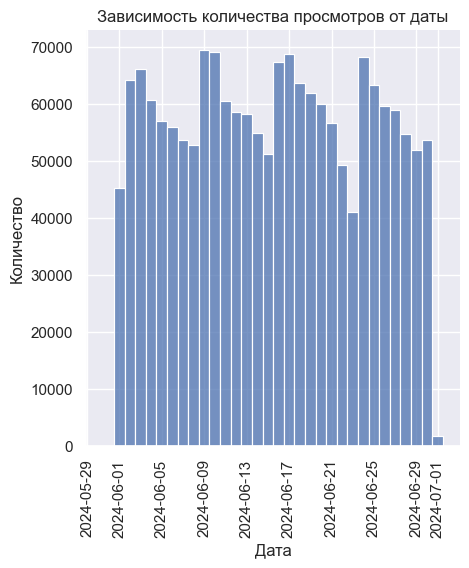

In [22]:
fig = sns.displot(events["local_time"].dt.date)
plt.title('Зависимость количества просмотров от даты')
fig.ax.tick_params(axis='x', labelrotation=90)
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.show()

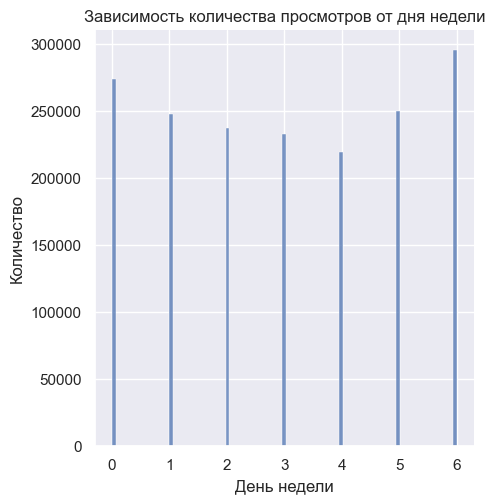

In [23]:
fig = sns.displot(events["local_time"].dt.day_of_week)
plt.title('Зависимость количества просмотров от дня недели')
plt.xlabel('День недели')
plt.ylabel('Количество')
plt.show()